# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип 
работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**ser_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Инструкция по выполнению проекта

### Откройте файл с данными и изучите общую информацию

- [x] Путь к файлу: `/datasets/games.csv`. Скачать датасет

### Подготовьте данные

- [x] Замените названия столбцов (приведите к нижнему регистру);
- [x] Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- [x] Обработайте пропуски при необходимости:
  - [x] Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
  - [x] Опишите причины, которые могли привести к пропускам;
  - [x] Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- [x] Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Проведите исследовательский анализ данных

- [x] Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x] Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x] Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- [x] Не учитывайте в работе данные за предыдущие годы.
- [x] Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- [x] Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- [x] Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- [x] Соотнесите выводы с продажами игр на других платформах.
- [x] Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Составьте портрет пользователя каждого региона

- [x] Определите для пользователя каждого региона (NA, EU, JP):
- [x] Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- [x] Самые популярные жанры (топ-5). Поясните разницу.
- [x] Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Проверьте гипотезы

- [x] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x] Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- [x] Задайте самостоятельно пороговое значение alpha.
- [x] Поясните:
    - [x] Как вы сформулировали нулевую и альтернативную гипотезы;
    - [x] Какой критерий применили для проверки гипотез и почему.

### Напишите общий вывод

Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

## Откройте файл с данными и изучите общую информацию

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Считаем данные из csv-файла в датафрейм и сохраним в переменную `games`. Путь к файлу: `/datasets/games.csv`

In [2]:
games = pd.read_csv('/datasets/games.csv')

Выведим первые 20 строчек датафрейма `games` на экран.

In [3]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Можно заметить пропуска в последних 3 столбах и некорректную запись столбов

Выведим основную информацию о датафрейме с помощью метода `info()` и `describe()`

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходимо заменить диты джанных в столбах 2 и 9 

In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Подготовка данных

### Общая подготовка

Выведим количество пропущенных значений для каждого столбца.

In [6]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Выведим на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

In [7]:
games.duplicated().sum()

0

Приводим наименование столбов к корректному виду

In [8]:
games.columns = games.columns.str.lower()

Проверим изменение, выведя первые 5 строк датафрейма

In [9]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Добавление нового столба

In [10]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Проверим изменение, выведя первые 5 строк датафрейма

In [11]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Обработка стобла `name`

Наименование игры - важная часть данных, поэтому строки с пропущеными значениями не нужны.

Удалим строки с пропущенным значением в столбце `name`

In [12]:
games = games.dropna(subset=['name'])

Обновим индексы в таблице после удаления строк

In [13]:
games = games.reset_index(drop=True)

Больше изменений в стобле не требуется

### Обработка стобла `platform`

Пропущеных значений в столбе нет, тип данных в норме 

Выведим перечень уникальных значений столбца 

In [14]:
games['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Построи диаграму распределения количества проданных копий по платформам

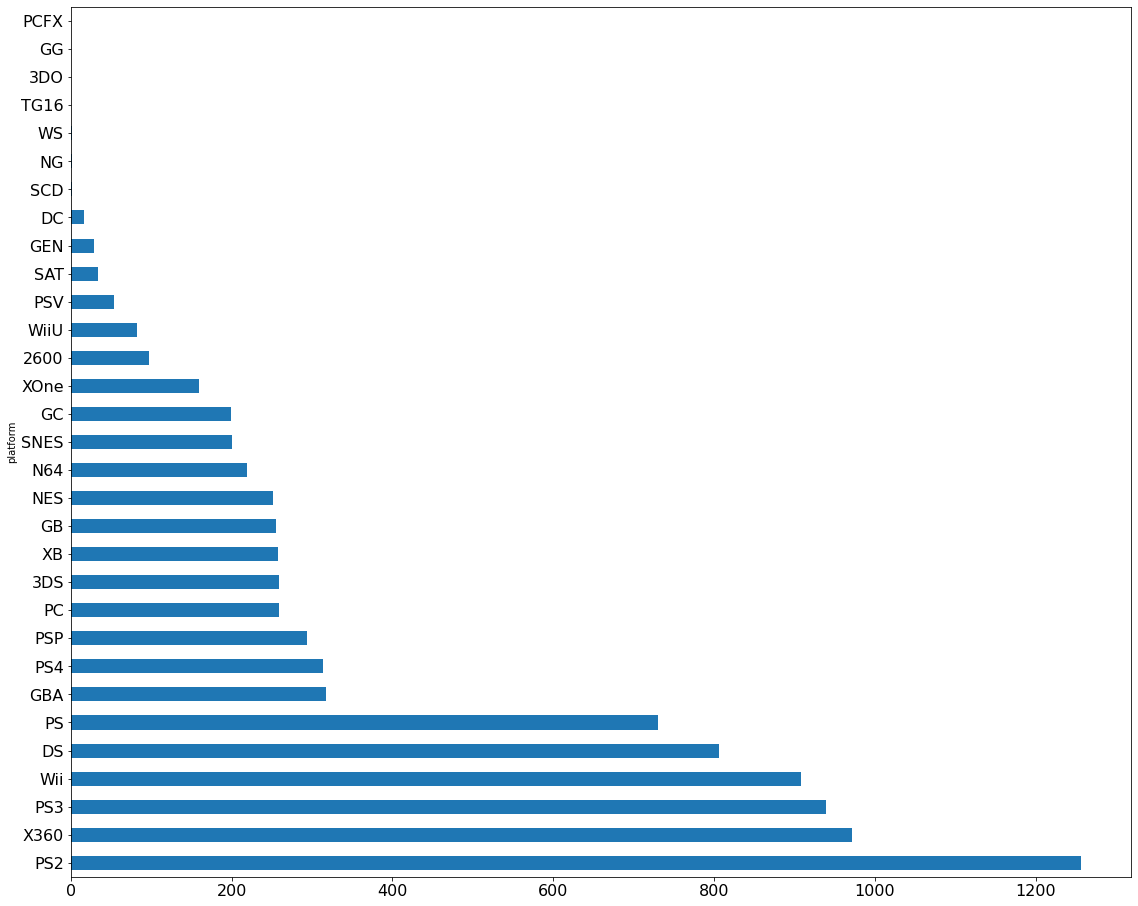

In [15]:
[
    games
    .pivot_table(
        index = 'platform', 
        values = 'total_sales', 
        aggfunc = 'sum')
    .sort_values(
        by = 'total_sales', 
        ascending = False)
    .plot(
        kind = 'barh', 
        figsize = (19,16), 
        rot = 0, 
        legend = False, 
        fontsize = 16)
];

Удалим платформы с минимальным количеством продаж

In [16]:
games = games.query('platform != "PCFX"')

In [17]:
games = games.query('platform != "GG"')

In [18]:
games = games.query('platform != "3DO"')

In [19]:
games = games.query('platform != "TG16"')

In [20]:
games = games.query('platform != "WS"')

In [21]:
games = games.query('platform != "NG"')

In [22]:
games = games.query('platform != "SCD"')

In [23]:
games = games.query('platform != "2600"')

Значения уникальные, изменения в столбце не нужны

### Обработка стобла `year_of_release`

В данном столбе представлен год выпуска игры, поэтому изменим тип данных на специальный формат для даты

In [24]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format="%Y").dt.year

Проверим количество значений по годам и найдем квантили по столбу `year_of_release`

In [25]:
display(games['year_of_release'].value_counts().sort_values())

1983.0       6
1987.0      10
1988.0      13
1985.0      13
1984.0      13
1989.0      15
1990.0      16
1986.0      19
1991.0      41
1992.0      42
1993.0      57
1994.0     111
1995.0     211
1996.0     260
1997.0     289
1999.0     336
2000.0     348
1998.0     379
2001.0     480
2016.0     502
2013.0     544
2014.0     581
2015.0     606
2012.0     653
2004.0     762
2003.0     775
2002.0     829
2005.0     939
2006.0    1006
2011.0    1136
2007.0    1197
2010.0    1255
2009.0    1426
2008.0    1427
Name: year_of_release, dtype: int64

In [26]:
(
    games['year_of_release']
    .quantile([0.01, .5, .90, .9976])  
)

0.0100    1992.0
0.5000    2007.0
0.9000    2014.0
0.9976    2016.0
Name: year_of_release, dtype: float64

В столбце писутствует 269 пропущенных значений - небольшой процент от таблицы, поэтому можем удалить строкки с пропусками и пороговые значения нижнего квантиля

In [27]:
games = games.query('1987 <= year_of_release')

Обновим индексы в таблице после удаления строк

In [28]:
games = games.reset_index(drop=True)

Выполним проверку

In [29]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16246 entries, 0 to 16245
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16246 non-null  object 
 1   platform         16246 non-null  object 
 2   year_of_release  16246 non-null  float64
 3   genre            16246 non-null  object 
 4   na_sales         16246 non-null  float64
 5   eu_sales         16246 non-null  float64
 6   jp_sales         16246 non-null  float64
 7   other_sales      16246 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
 11  total_sales      16246 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [30]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8264
user_score         6408
rating             6479
total_sales           0
dtype: int64

Больше изменений в стобле не требуется

### Обработка стобла `genre`

Пропущеных значений в столбе нет, тип данных в норме 

Выведим перечень уникальных значений столбца 

In [31]:
games['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Значения уникальные, изменения в столбце не нужны

### Обработка стобла `na_sales`,  `eu_sales`,  `jp_sales` и `other_sales`

Тип данных соответствует норме, пропущенных значений нет. Проверим данные на аномальные значения

In [32]:
(
    games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,na_sales,eu_sales,jp_sales,other_sales
count,"16,246.00","16,246.00","16,246.00","16,246.00"
min,0.00,0.00,0.00,0.00
max,41.36,28.96,10.22,10.57


In [33]:
(
    games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .quantile([0.01, .5, .90, .998])  
    .style.format("{:,.2f}")
)

,na_sales,eu_sales,jp_sales,other_sales
0.01,0.00,0.00,0.00,0.00
0.5,0.08,0.02,0.00,0.01
0.9,0.60,0.35,0.17,0.10
0.998,6.69,4.35,3.24,1.59


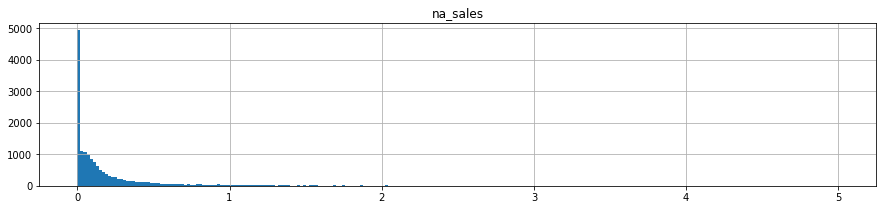

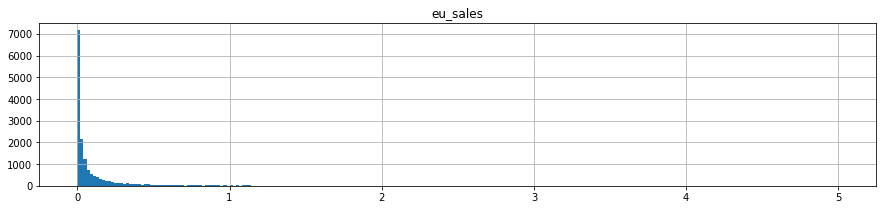

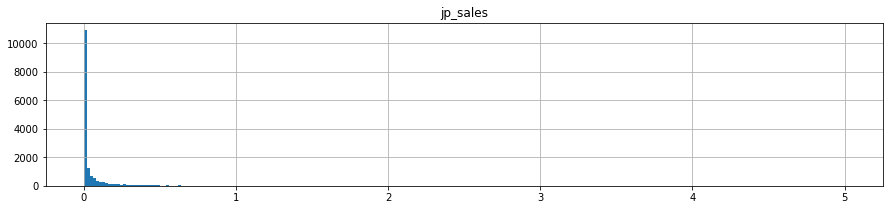

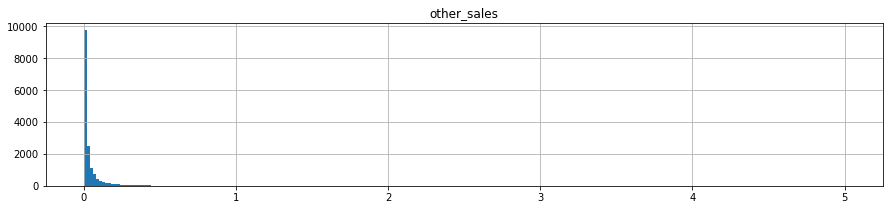

In [34]:
for name in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    games.hist(column = name, bins = 250, range = (0, 5), figsize = (15,3));

Можно заметить сильно выбивающиеся значения, поэтому уберем их согласно квантилю 

In [35]:
games = games.query('na_sales <= 6.68')

In [36]:
games = games.query('eu_sales <= 4.35')

In [37]:
games = games.query('jp_sales <= 3.23')

In [38]:
games = games.query('other_sales <= 1.58')

Больше изменений в стобле не требуется

### Обработка стобла `critic_score`

Тип данных в столбе соответсвует данным

Проверим уникальные значения рейтинга, на предмет отрицательных значений и значений выше 100

In [39]:
games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Построим гистограму и отбираем аномальные значения

In [40]:
(
    games['critic_score']
    .quantile([0.01, .5, .90, .999])  
)

0.010    31.26
0.500    71.00
0.900    85.00
0.999    97.00
Name: critic_score, dtype: float64

Удаляем данные ниже порогового значения

In [41]:
games = games.query('31.26 <= critic_score or critic_score.isna()')

Подставить данные нельзя, на разных платформах игра будет вести себя по-разному. Больше изменений в стобле не требуется

### Обработка стобла `user_score`

Проверим уникальные значения рейтинга, на предмет отрицательных значений и значений выше 10

In [42]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '2', '2.1', '2.2', '2.3',
       '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2', '3.3',
       '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2', '4.3',
       '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2', '5.3',
       '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2', '6.3',
       '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2', '7.3',
       '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2', '8.3',
       '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2', '9.3',
       '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Замечаем значение `tbd`. Выведем на экран строки с этим значением

In [43]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
116,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
292,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
505,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
624,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
693,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16226,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16228,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16229,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16235,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


Так как непонятно, почему стоит данное значение, заменим его на NaN

In [44]:
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan

Приведем тип данных в числовое значение

In [45]:
games['user_score'] = games['user_score'].astype('float64')

Построим гистограму и отбираем аномальные значения

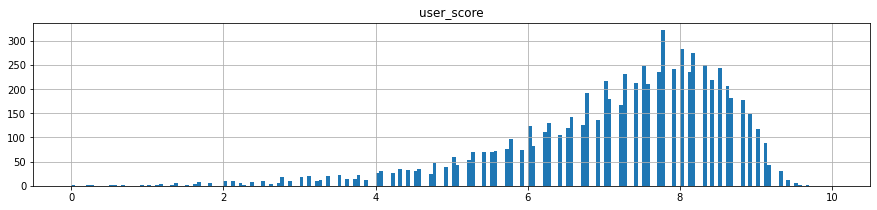

In [46]:
 games.hist(column = 'user_score', bins = 200, range = (0, 10), figsize = (15,3));

In [47]:
(
    games['user_score']
    .quantile([0.01, .5, .90, .999])  
)

0.010    2.4370
0.500    7.5000
0.900    8.7000
0.999    9.4663
Name: user_score, dtype: float64

Удаляем данные ниже порогового значения

In [48]:
games = games.query('2.4370 <= user_score or user_score.isna()')

Подставить данные нельзя, на разных платформах игра будет вести себя по-разному. Больше изменений в стобле не требуется

### Обработка стобла `rating`

Тип данных в столбе соответсвует данным

Проверим уникальные значения в наименование рейтинга

In [49]:
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Данные в порядке, изменения не требуются

### Проверка 

Обновим индексацию

In [51]:
games = games.reset_index(drop=True)

Проверим уровень потерь данных при удаление аномальных значений

In [52]:
percent_5 = 16715*95/100
percent_10 = 16715*90/100

if games.shape[0] >= percent_5:
    print('Оптимальный уровень потерь записей')
elif games.shape[0] >= percent_10:
    print ('Критичный уровень потерь записей')
else:
    print('Потеряно слишком много записей')

Оптимальный уровень потерь записей


In [53]:
games.shape[0]

16015

Убедимся, что заполнили пропуски, которые возможно

In [54]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8218
user_score         8751
rating             6456
total_sales           0
dtype: int64

Убедимся, что тип данных везде заменили

In [55]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16015 entries, 0 to 16014
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16015 non-null  object 
 1   platform         16015 non-null  object 
 2   year_of_release  16015 non-null  float64
 3   genre            16015 non-null  object 
 4   na_sales         16015 non-null  float64
 5   eu_sales         16015 non-null  float64
 6   jp_sales         16015 non-null  float64
 7   other_sales      16015 non-null  float64
 8   critic_score     7797 non-null   float64
 9   user_score       7264 non-null   float64
 10  rating           9559 non-null   object 
 11  total_sales      16015 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

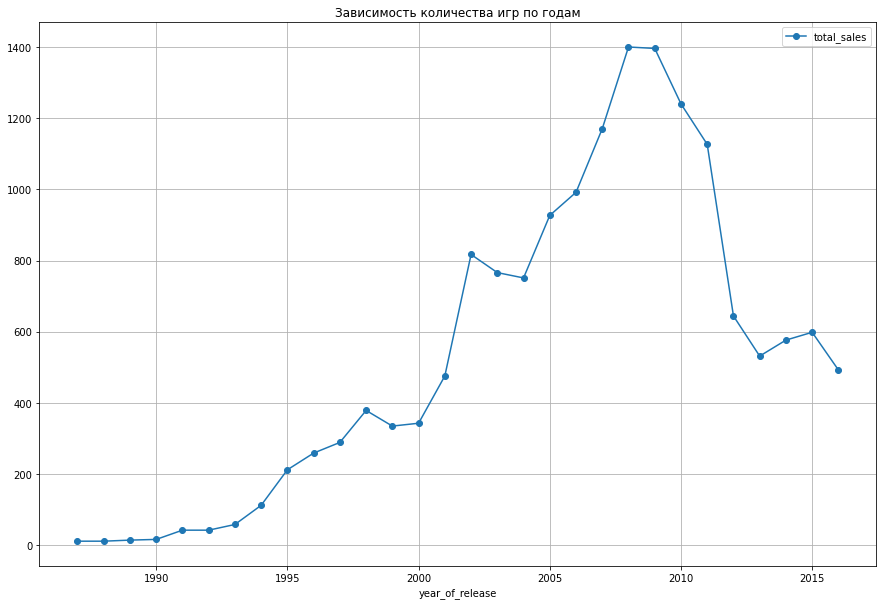

In [56]:
[
    games
    .pivot_table(
        index = 'year_of_release', 
        values = 'total_sales', 
        aggfunc = 'count')
    .sort_values(
        by = 'year_of_release', 
        ascending = False)
    .plot(
        marker = 'o',
        grid=True,
        figsize = (15,10),
        title=('Зависимость количества игр по годам'))
];

Начало производства, по данным, приходится на 1984 год. До 2000 года производство медленно наращивается, дальше темпы производства стремительно возрастают до 2008 года, связано это с тем, что компьютеры и приставки получили широкое распростронение

После 2009 наблюдается спад, возможно он отображает переход на мобильные игры 

Поэтому можно разделить данные по 3 периодам:
- до 2000
- с 2000 по 2008
- с 2008 по настоящее время

Данные по 2008 - совершенно не отображает ситуацию

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Создаем сводную таблицу и посмотрим на продажи по платформам, сортируем таблицу по общим продажам

In [57]:
(
games
.pivot_table(
        index='platform',
        values='total_sales',
        aggfunc='sum')
.sort_values(by = 'total_sales', ascending = False)
)

,total_sales
platform,
PS2,1121.88
PS3,827.88
X360,819.85
PS,704.19
Wii,628.50
DS,618.13
GBA,296.43
PSP,271.29
PS4,270.07


Создадим список с топ-10 платформ

In [58]:
top_10_platform = (
    games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by = 'total_sales', ascending = False)
    .head(10)
    .reset_index()
)
top_10_platform = top_10_platform['platform'].tolist()

Создадим график динамики продаж разных платформ по годам

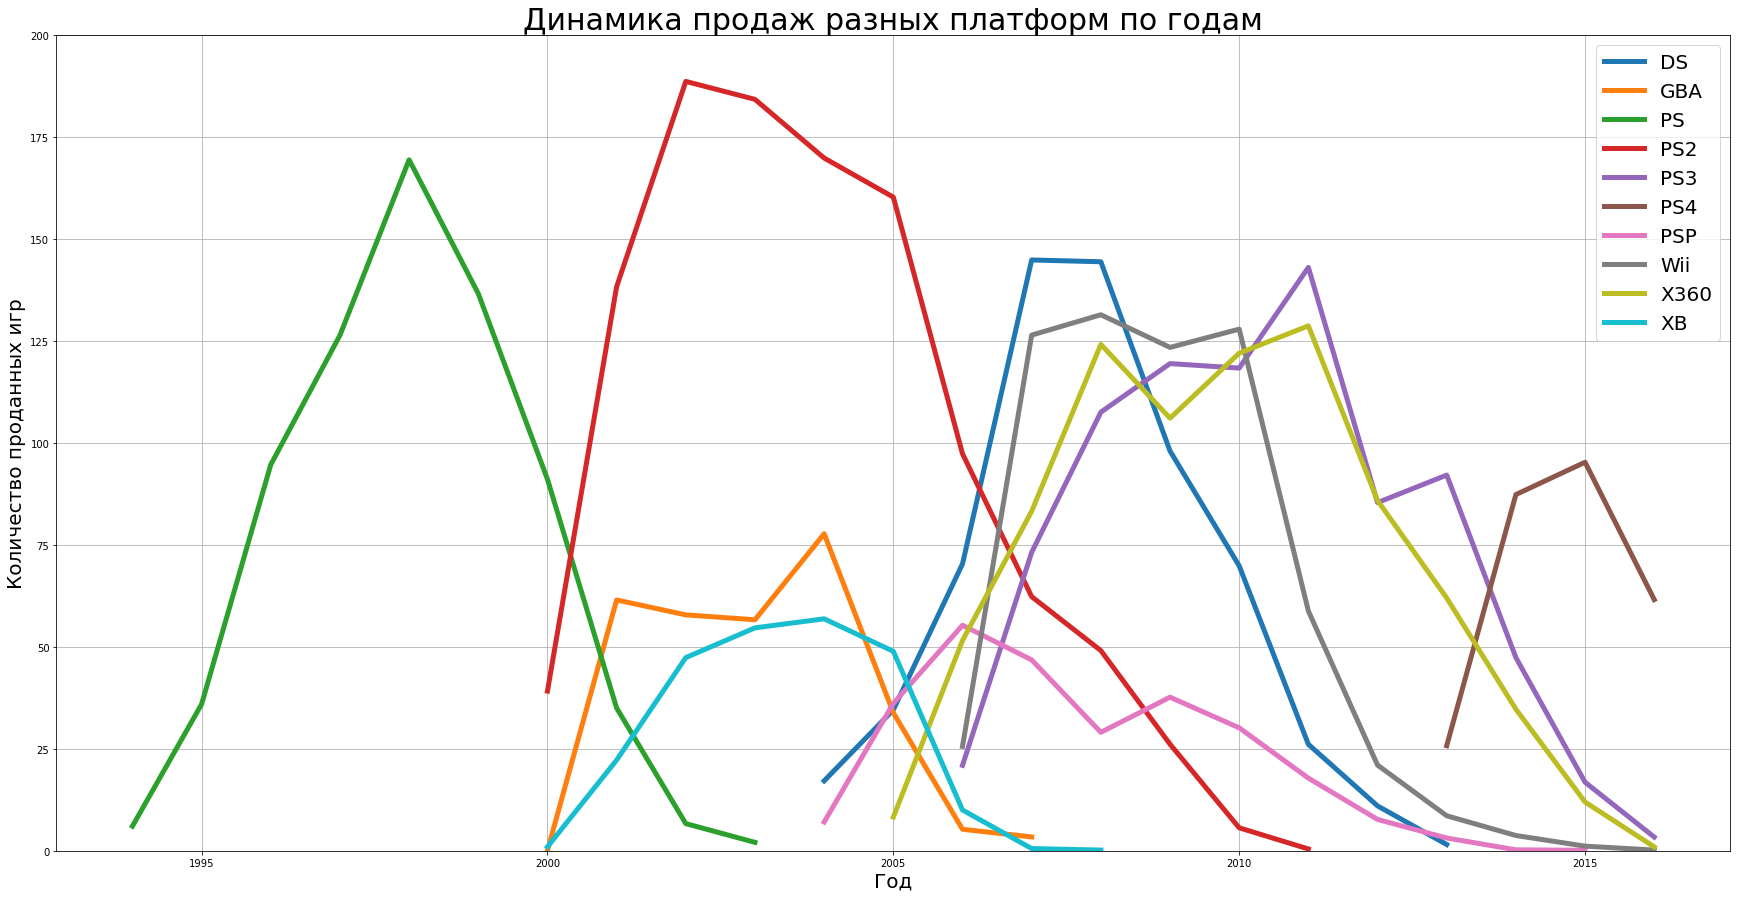

In [60]:
(
    games
    .query('platform in @top_10_platform')
    .pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum')
    .reset_index()
    .plot(x='year_of_release', figsize=(30, 15), ylim=(0, 200), grid=True, linewidth=5.0)
)
plt.title('Динамика продаж разных платформ по годам', fontsize=30)
plt.legend(fontsize=20)
plt.xlabel('Год', fontsize=20)
plt.ylabel('Количество проданных игр', fontsize=20);


Можно замтить, что платформа теряет актуальность примерно через 10 лет

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

По графику выше видно, что платформа живет примерно 10 лет. Но также многие платформы существуют уже давно, поэтому актуальным периодом можно считать последние 3 года

Создадим новую таблицу `games_new`, куда войдут данные только за последние три года

In [61]:
games_new = games.query('year_of_release >= 2014')

Выводим первые 10 строк нового датафрейма

In [62]:
games_new.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
28,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
30,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
33,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
36,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
42,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
45,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
47,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
78,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
87,Destiny,PS4,2014.0,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [63]:
(
    games_new
    .pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum')
    .style
    .format("{:.2f}")
    .background_gradient(cmap='YlOrRd', axis=1)

)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,43.28,13.26,47.40,87.38,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.51,16.82,95.31,0.12,6.25,1.14,16.35,11.96,59.93
2016.0,15.14,5.23,3.37,61.61,nan,4.25,0.18,4.60,0.96,26.12


Заметим, что все платформы падают, топ-3 платформы:
- 3DS    
- PS4
- XOne

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [64]:
games_new.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,704.000000,866.000000,1666.000000
mean,2014.949580,0.162869,0.147365,0.055348,0.044790,72.826705,6.726905,0.410372
std,0.799311,0.414247,0.371828,0.212606,0.115247,11.245158,1.444464,0.920865
min,2014.000000,0.000000,0.000000,0.000000,0.000000,32.000000,2.500000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.900000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.047500,0.040000,81.000000,7.800000,0.350000
max,2016.000000,4.590000,4.330000,3.180000,1.280000,97.000000,9.300000,11.680000


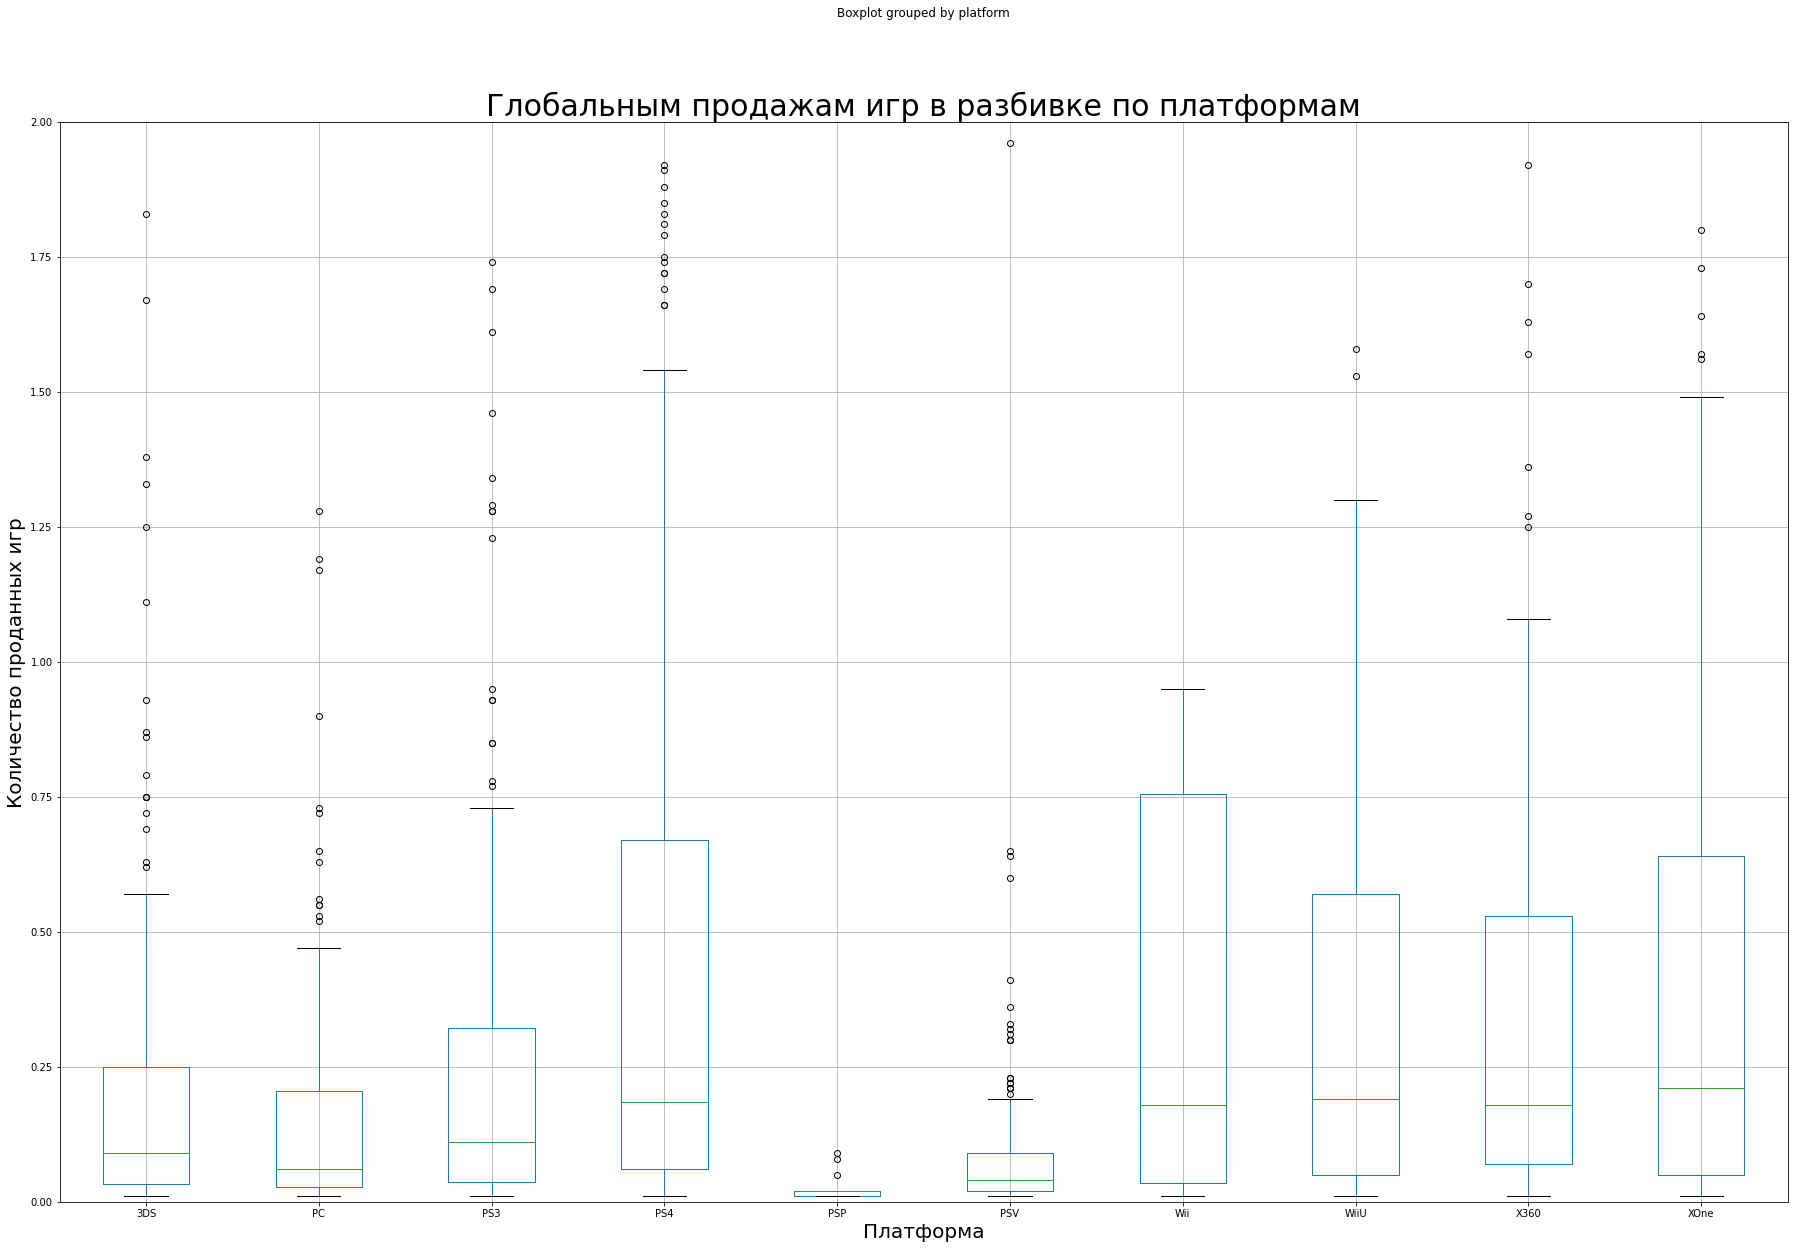

In [65]:
games_new.boxplot('total_sales',by='platform', figsize=(30, 20)).set_ylim(0, 2)
plt.title('Глобальным продажам игр в разбивке по платформам', fontsize=30, fontname='Times New Roman')
plt.xlabel('Платформа', fontsize=20)
plt.ylabel('Количество проданных игр', fontsize=20);

Платформа 3DS, взяла лидирующую позицию благодаря выбросам,  остальные две лидирующие платформы остались на тех же позициях. Также можно отметить платформы Wii и WiiU, тоже держаться достаточно хорошо

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для данного пункта возьмем самую популярную платформу `PS4`

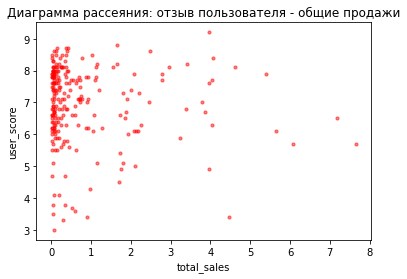

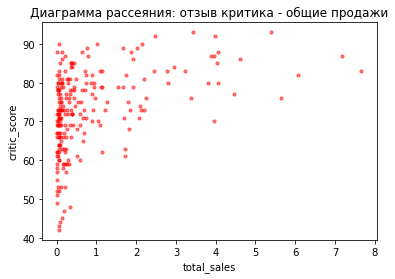

In [66]:
(
    games_new[games_new['platform'] == 'PS4']
    .plot(kind='scatter',
          y='user_score' , 
          x='total_sales', 
          alpha=0.5, 
          subplots=True, 
          c = 'r', s = 10)
)
plt.title('Диаграмма рассеяния: отзыв пользователя - общие продажи')

(
    games_new[games_new['platform'] == 'PS4']
    .plot(kind='scatter',
          y='critic_score' , 
          x='total_sales', 
          alpha=0.5, 
          subplots=True, 
          c = 'r', s = 10)
)
plt.title('Диаграмма рассеяния: отзыв критика - общие продажи');

In [67]:
print(f'Корреляция между отзывами пользователей и продажами', games_new[games_new['platform'] == 'PS4']['total_sales'].corr(games_new['user_score']))
print(f'Корреляция между отзывами критиков и продажами', games_new[games_new['platform'] == 'PS4']['total_sales'].corr(games_new['critic_score']))


Корреляция между отзывами пользователей и продажами -0.071188216424346
Корреляция между отзывами критиков и продажами 0.4126206718951497


Корреляции между отзывами и продажами нет. Скорее всего это правило можно паспростанить и на другие платформы

### Соотнесите выводы с продажами игр на других платформах

Воспроизведем действий для 2 других платформ

Корреляция между отзывами пользователей и продажами -0.11799017337412075
Корреляция между отзывами критиков и продажами 0.4421531896808324


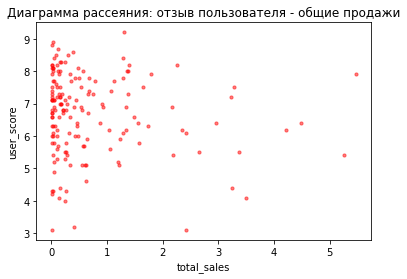

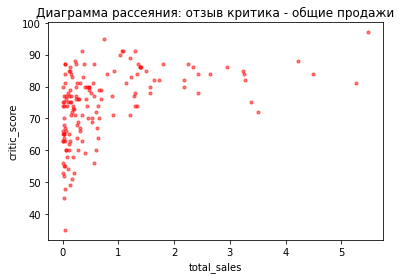

In [68]:
(
    games_new[games_new['platform'] == 'XOne']
    .plot(kind='scatter',
          y='user_score' , 
          x='total_sales', 
          alpha=0.5, 
          subplots=True, 
          c = 'r', s = 10)
)
plt.title('Диаграмма рассеяния: отзыв пользователя - общие продажи')

(
    games_new[games_new['platform'] == 'XOne']
    .plot(kind='scatter',
          y='critic_score' , 
          x='total_sales', 
          alpha=0.5, 
          subplots=True, 
          c = 'r', s = 10)
)
plt.title('Диаграмма рассеяния: отзыв критика - общие продажи');
print(f'Корреляция между отзывами пользователей и продажами', games_new[games_new['platform'] == 'XOne']['total_sales'].corr(games_new['user_score']))
print(f'Корреляция между отзывами критиков и продажами', games_new[games_new['platform'] == 'XOne']['total_sales'].corr(games_new['critic_score']))


Корреляция между отзывами пользователей и продажами 0.2230557565715243
Корреляция между отзывами критиков и продажами 0.3126730120146474


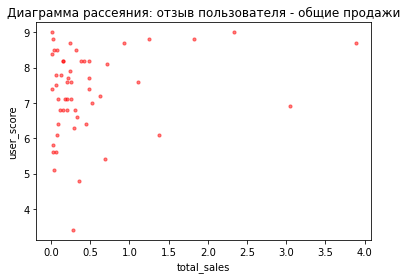

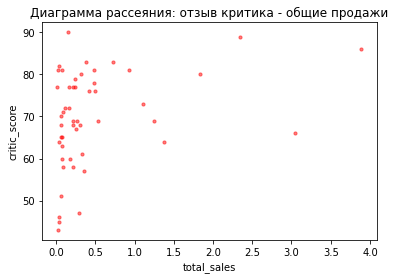

In [69]:
(
    games_new[games_new['platform'] == '3DS']
    .plot(kind='scatter',
          y='user_score' , 
          x='total_sales', 
          alpha=0.5, 
          subplots=True, 
          c = 'r', s = 10)
)
plt.title('Диаграмма рассеяния: отзыв пользователя - общие продажи')

(
    games_new[games_new['platform'] == '3DS']
    .plot(kind='scatter',
          y='critic_score' , 
          x='total_sales', 
          alpha=0.5, 
          subplots=True, 
          c = 'r', s = 10)
)
plt.title('Диаграмма рассеяния: отзыв критика - общие продажи');
print(f'Корреляция между отзывами пользователей и продажами', games_new[games_new['platform'] == '3DS']['total_sales'].corr(games_new['user_score']))
print(f'Корреляция между отзывами критиков и продажами', games_new[games_new['platform'] == '3DS']['total_sales'].corr(games_new['critic_score']))


Предположение подтвердилось, корреляции между признаками нет

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

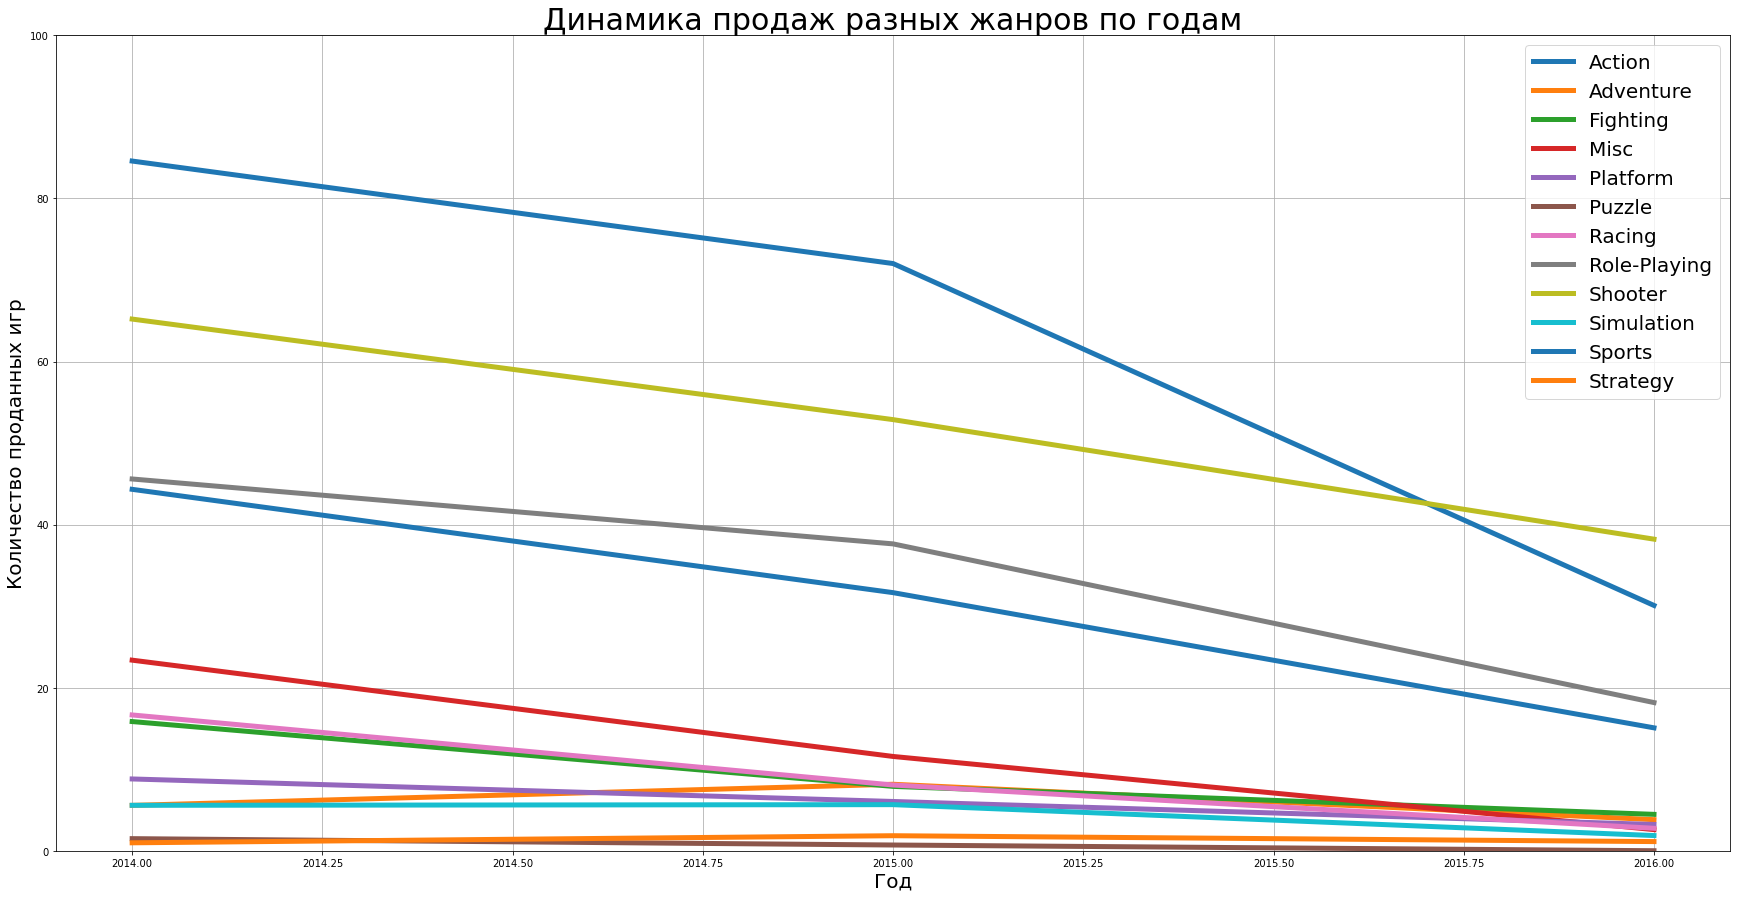

In [70]:
(
    games_new
    .pivot_table(
        index='year_of_release',
        columns='genre',
        values='total_sales',
        aggfunc='sum')
    .reset_index()
    .plot(x='year_of_release', figsize=(30, 15), ylim=(0, 100), grid=True, linewidth=5.0)
)

plt.title('Динамика продаж разных жанров по годам', fontsize=30, fontname='Times New Roman')
plt.legend(fontsize=20)
plt.xlabel('Год', fontsize=20)
plt.ylabel('Количество проданных игр', fontsize=20);

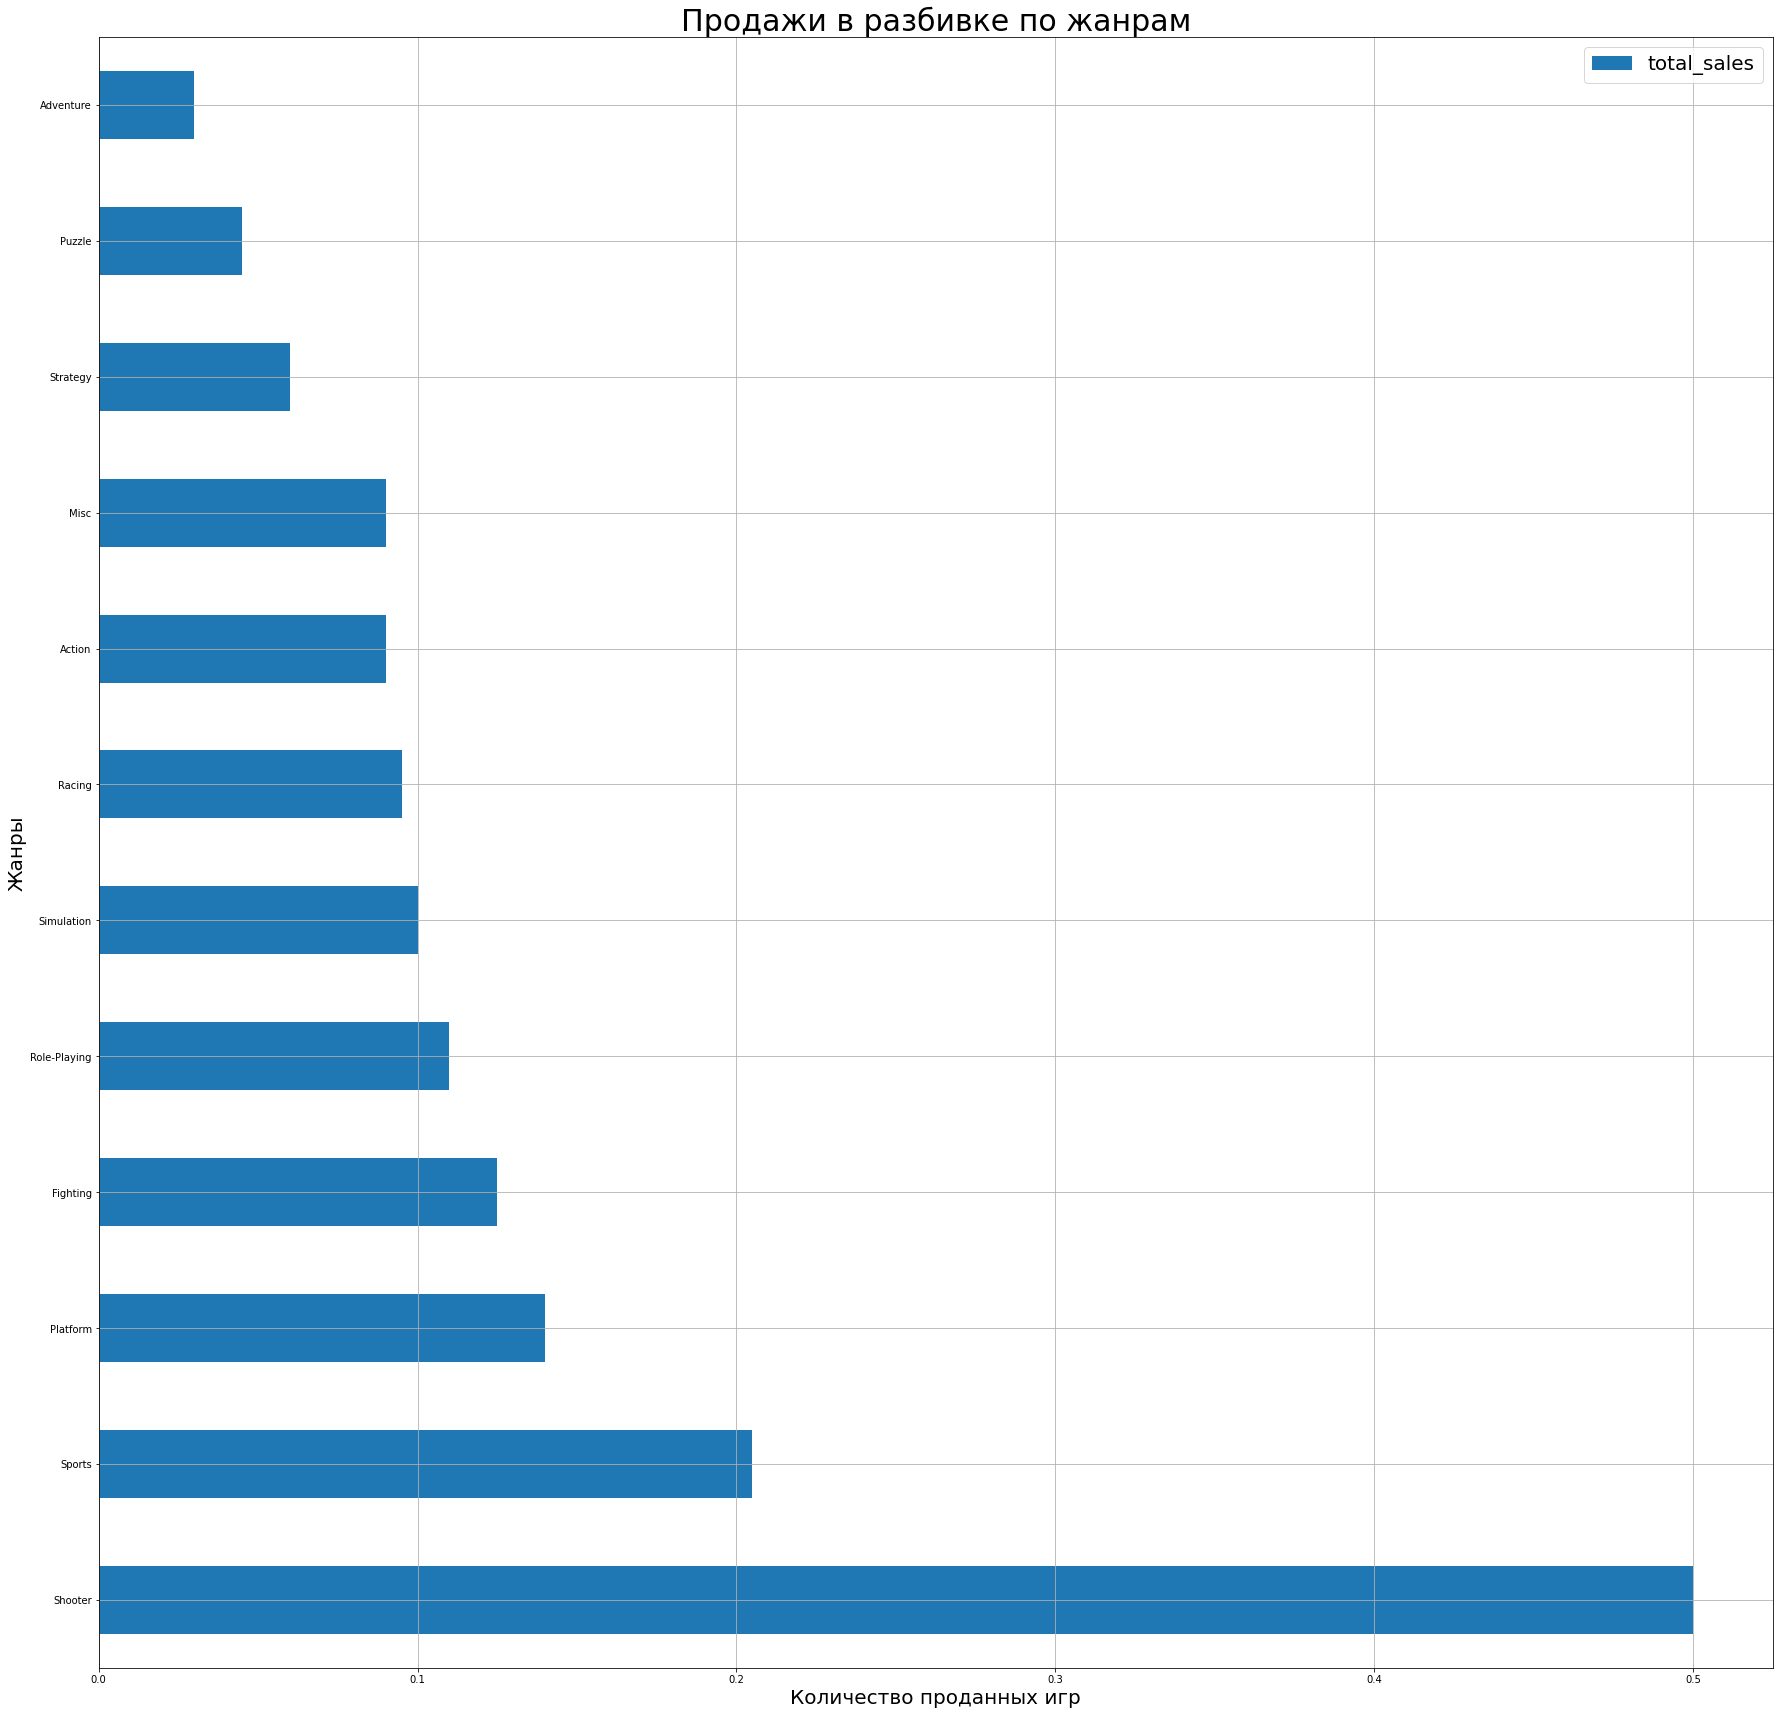

In [71]:
(
    games_new
    .pivot_table(
        index='genre',
        values='total_sales',
        aggfunc='median')
    .reset_index()
    .sort_values(by = 'total_sales', ascending = False)
    .plot(x='genre',kind='barh', figsize=(30, 30), grid=True, linewidth=5.0)
)

plt.title('Продажи в разбивке по жанрам', fontsize=30, fontname='Times New Roman')
plt.legend(fontsize=20)
plt.xlabel('Количество проданных игр', fontsize=20)
plt.ylabel('Жанры', fontsize=20);

In [72]:
(
games_new
.pivot_table(
        index='genre',
        values='total_sales',
        aggfunc='median')
.sort_values(by = 'total_sales', ascending = False)
)

,total_sales
genre,
Shooter,0.500
Sports,0.205
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Racing,0.095
Action,0.090
Misc,0.090


Отчетливо видно, что от жанра игр продажи зависят напрямую

Наиболее популярные жанры:
- Shooter
- Sports
- Platform	

Наименее популярные жанры:
- Strategy
- Puzzle
- Adventure

## Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

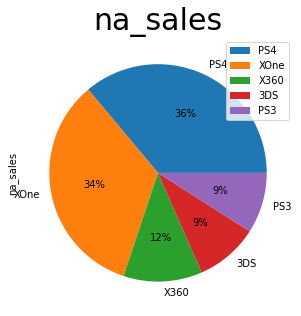

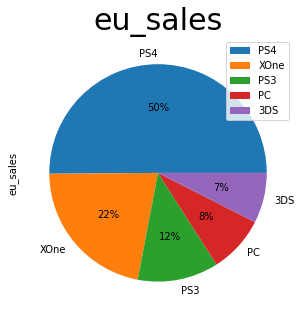

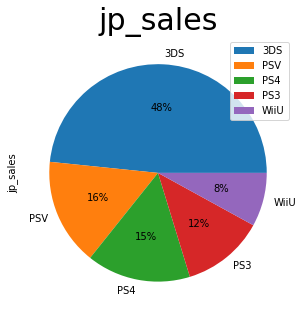

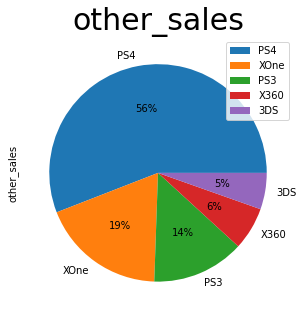

In [217]:
for region in['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    top_5 = (
        games_new
        .pivot_table(
            index='platform', 
            values=region, 
            aggfunc='sum')
        .sort_values(by = region, ascending = False)
        .head()
        .reset_index()
    )
    top_5 = top_5['platform'].tolist()
    games_new_by_region = (
        games_new
         .query('platform in @top_5')
         .pivot_table(
                index='platform',
                values= region,
                aggfunc='sum')
        .sort_values(by = region, ascending = False)
        .plot.pie(x='platform', y=region, autopct='%1.0f%%', figsize=(5, 5))
    )
    plt.title(region, fontsize=30, fontname='Times New Roman')
    

Самая предпочтительная платформа PS4 везде, в Северной Америке почти одинаково с XBox

### Самые популярные жанры (топ-5). Поясните разницу.

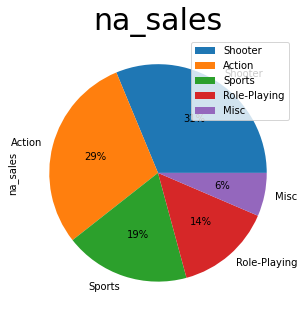

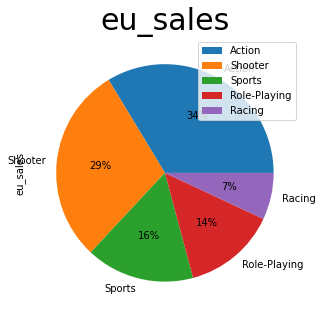

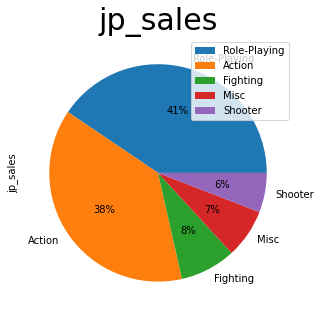

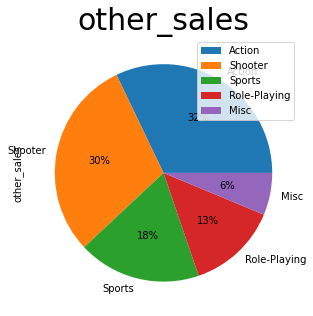

In [211]:
for region in['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    top_5 = (
        games_new
        .pivot_table(
            index='genre', 
            values=region, 
            aggfunc='sum')
        .sort_values(by = region, ascending = False)
        .head()
        .reset_index()
    )
    top_5 = top_5['genre'].tolist()
    games_new_by_region = (
        games_new
         .query('genre in @top_5')
         .pivot_table(
                index='genre',
                values= region,
                aggfunc='sum')
        .sort_values(by = region, ascending = False)
        .plot.pie(x='genre', y=region, autopct='%1.0f%%', figsize=(5, 5))
    )
    plt.title(region, fontsize=30, fontname='Times New Roman')
    

Shooter, Action, Role-playing вошли в топы всех регионов, но порядок и соотношение у всех разное

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

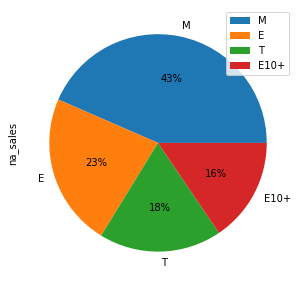

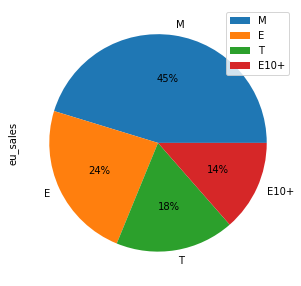

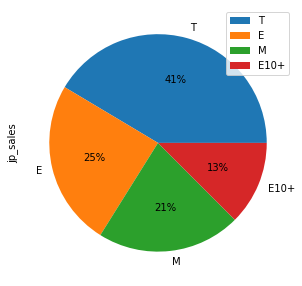

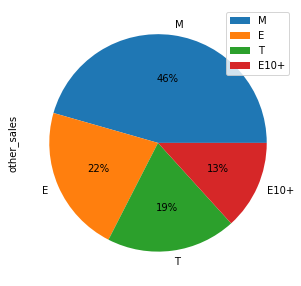

In [216]:
for region in['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    games_new_by_region = (
        games_new
         .pivot_table(
                index='rating',
                values= region,
                aggfunc='sum')
        .sort_values(by = region, ascending = False)
    )
    games_new_by_region.plot.pie(x='rating', y=region, autopct='%1.0f%%', figsize=(5, 5))
    

Игры с рейтингом Е10+ это 13-16% от общих продаж везде(самые низкие)

Игры с рейтингом Е стабильно занимают второе место с долей 22-25%

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
- H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [231]:
results = st.ttest_ind(games_new[(games_new['platform'] =='XOne') & (games_new['user_score'] > 0)]['user_score'], 
                       games_new[(games_new['platform'] !='PC') & (games_new['user_score'] > 0)]['user_score'], 
                       equal_var = False)
alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу' )

0.3588925607879081
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

- H0: средний пользовательский рейтинг жанров Action и Sports одинаковые
- H1: средний пользовательский рейтинг жанров Action и Sports разные

In [235]:
results = st.ttest_ind(games_new[(games_new['genre'] =='Action') & (games_new['user_score'] > 0)]['user_score'], 
                       games_new[(games_new['genre'] =='Sports') & (games_new['user_score'] > 0)]['user_score'], 
                       equal_var = False)
alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу' )

1.6343640252196557e-11
Отвергаем нулевую гипотезу


## Общий вывод

Самая предпочтительная платформа PS4 везде, в Северной Америке почти одинаково с XBox. Поэтому лучше вкладываться в разработку игр на данные платформы. Также предпочтительно выбирать жанры Shooter, Action, Role-playing, которые вошли в топы всех регионов. С учетом данных рекомендаций можно получить наибольший охват аудитории

В целом про положение дел в игровой индустрии: рынок "немобильных" игр постепенно погибает. Все сейчас в погоне за графикой, новыми технологями, в связи с этим средний бюджет на разработку одной игры за последние годы заметно вырос. Более того, сейчас игрок не так ценит идею и глубины игры, большинство может обрадовать только хорошая картинка и оптимизация - а играть им понравится только в том случае, если в игре будут стрелочки куда идти. Иначе это слишком трудно.

В итоге, гиганты игровой индустрии гоняются за технологиями, а более мелкие компании, не имеющие таких бюджетов, вынуждены отступать, т.к. единственный их козырь - способность создать глубокую игру с атмосферной - нынче не ценится.
Всё это привело к тому, что рынок уже который год падает. И, скорее всего, будет падать, потому что тенденции к изменению ценностей на те, которые были всего с десяток лет назад, нет.